In [3]:
import matplotlib.pyplot as plt
from lib.preprocess import preprocess_progenitor_size, preprocess_whole_size
from lib.utils import shrink_and_align_stats
from lib.score import REF
from lib.analyser import show_curve, show_curve_progenitor
from jf.utils.export import Exporter
from jf.autocompute.jf import L
from jf.models.stringmodel import read_model
import os
import numpy as np

## Protocol

...

In [4]:
sm = read_model("generation")

In [5]:
from lib.sde.grn.grn2 import GRNMain2
from lib.sde.mutate import mutate_grn2

class Solution:
    def __init__(self, grn):
        self.grn = grn
        
    def copy(self):
        return Solution(self.grn.copy())
        
    def mutate(self):
        mutate_grn2(self.grn)

In [6]:
def plot_max_fitness(exporter, sm):
    ls = list(filter(sm.match, sorted(exporter.list())))
    vals = [(int(sm.extract(x)["generation"]), max(L(exporter.load(x)).fit)) for x in ls]
    vals.sort()
    plt.title("Max fitness")
    plt.plot(*zip(*vals))
    plt.ylim(bottom=0)
    
def plot_sum_fitness(exporter, sm):
    ls = list(filter(sm.match, sorted(exporter.list())))
    vals = [(int(sm.extract(x)["generation"]), sum(L(exporter.load(x)).fit)) for x in ls]
    vals.sort()
    plt.title("Sum fitness")
    plt.plot(*zip(*vals))
    plt.ylim(bottom=0)

In [7]:
# sm.pick_last(sorted(exporter.list()), slot="generation")

In [9]:
sorted(os.listdir("output/"))

['.ipynb_checkpoints',
 '2022-01-26',
 '2022-01-27',
 '2022-01-28',
 '2022-01-29',
 'default',
 'exp_stability',
 'exp_stability_v2',
 'logs',
 'mutationv3_t0.5_n5_o2.0_i0',
 'mutationv3_t0.5_n5_o2.0_i1',
 'mutationv3_t0.5_n5_o2.0_i2',
 'mutationv3_t0.5_n7_o2.0_i0',
 'mutationv3_t0.5_n7_o2.0_i1',
 'mutationv3_t0.5_n7_o2.0_i2',
 'mutationv3_t0.5_n9_o2.0_i0',
 'mutationv3_t0.5_n9_o2.0_i1',
 'objective_0.25_g11_v5',
 'objective_0.25_g7_v5',
 'objective_0.25_g9_v5',
 'objective_0.5_g11_v5',
 'objective_0.5_g7_v5',
 'objective_0.5_g9_v5',
 'objective_1.0_g11_v5',
 'objective_1.0_g7_v5',
 'objective_1.0_g9_v5',
 'result_m1_t0.5_n7_o1.5_i0',
 'result_m1_t0.5_n7_o1.5_i1',
 'result_m1_t0.5_n7_o1.5_i2',
 'result_m1_t0.5_n7_o1.5_i3',
 'result_m1_t0.5_n7_o1.5_i4',
 'result_m3_t0.25_n7_o1.5_i0',
 'result_m3_t0.25_n7_o1.5_i1',
 'result_m3_t0.25_n7_o1.5_i2',
 'result_m3_t0.25_n7_o1.5_i3',
 'result_m3_t0.25_n7_o1.5_i4',
 'result_m3_t0.5_n5_o1.5_i0',
 'result_m3_t0.5_n5_o1.5_i1',
 'result_m3_t0.5_n5_o1

In [11]:
def score_one(name):
    exporter = Exporter(name=name, silent=True)
    last_gen = sm.pick_last(exporter.list(), slot="generation")
    if last_gen is None:
        return None
    res = exporter.load(last_gen)
    return max(res, key=lambda x: x.fit).fit

def score_prefix(prefix, ls):
    scores = []
    for x in ls:
        if not x.startswith(prefix):
            continue
        s = score_one(x)
        if s is not None:
            scores.append(s)
    return scores

In [12]:
s5 = score_prefix("unary_evolver_t0.5_n5_o2.0", os.listdir("output/"))
print("5", np.mean(s5), np.std(s5), s5)
s7 = score_prefix("unary_evolver_t0.5_n7_o2.0", os.listdir("output/"))
print("7", np.mean(s7), np.std(s7), s7)
s9 = score_prefix("unary_evolver_t0.5_n9_o2.0", os.listdir("output/"))
print("9", np.mean(s9), np.std(s9), s9)

5 31.922032063539586 0.5295069505550147 [31.183129955105596, 32.186201725084565, 32.396764510428596]
7 20.98450767080666 4.265037743853401 [15.057567727500961, 24.917182273111234, 22.978773011807785]
9 11.478237344702308 3.201931119229937 [11.291381365487462, 7.653456818838231, 15.489873849781228]


In [23]:
s5 = score_prefix("mutationv3_t0.5_n5_o2.0", os.listdir("output/"))
print("5", np.mean(s5), np.std(s5), s5)
s7 = score_prefix("mutationv3_t0.5_n7_o2.0", os.listdir("output/"))
print("7", np.mean(s7), np.std(s7), s7)
s9 = score_prefix("mutationv3_t0.5_n9_o2.0", os.listdir("output/"))
print("9", np.mean(s9), np.std(s9), s9)

5 7.041875387037014 0.5751393634332364 [7.308136639307845, 6.243157320958536, 7.57433220084466]
7 7.253057077229532 0.37417969177267796 [7.771318623771012, 6.901355306151864, 7.086497301765723]
9 6.768565658190284 0.8536448647301613 [7.6222105229204455, 5.914920793460123]


In [30]:
exporter = Exporter(name="unary_evolver_t0.5_n5_o2.0_i0")
exporter.list()

Exporting at output/unary_evolver_t0.5_n5_o2.0_i0


['generation_g6',
 'generation_g19',
 'generation_g10',
 'generation_g15',
 'generation_g17',
 'out',
 'generation_g21',
 'generation_g16',
 'generation_g11',
 'generation_g9',
 'generation_g20',
 'generation_g7',
 'definition',
 'generation_g4',
 'generation_g14',
 'generation_g13',
 'reload',
 'generation_g1',
 'generation_g22',
 'generation_g2',
 'generation_g12',
 'generation_g8',
 'generation_g18',
 'generation_g5',
 'generation_g3']

In [31]:
res = exporter.load("generation_g22")

In [32]:
L(res).fit

[18.27199044797073,
 8.826417573404859,
 26.772702496970748,
 4.476938827624042,
 23.52912056519923,
 12.507310916433449,
 19.466196064190854,
 28.54433243123027,
 0.25418601158439597,
 5.064160219430979,
 29.89457547707107,
 24.621320730885387,
 0.1429434403053939,
 5.146481582804749,
 31.995965830845126,
 8.571122652636799,
 27.6289507868256,
 9.716105037688443,
 10.075730022995344,
 2.3611476334294057,
 23.507490651658763,
 5.306462842385447,
 18.57277069183786,
 4.1836627116411815,
 4.297386615625281,
 5.044883864071501,
 4.972258199660255,
 28.592868960198444,
 0.0927915560642601,
 16.73588774645972,
 0.09586893678644887,
 8.5189227917953,
 30.057090715603252,
 23.97878385803239,
 32.15870724646125,
 32.396764510428596,
 18.591437286825865,
 11.435640140280103,
 4.092079346101878,
 27.094272623782494,
 12.098234550542614,
 7.3689910962521505,
 17.792466972171848,
 13.578739168643347,
 0.8294218547032819,
 11.196653964492926,
 17.86403914697383,
 10.832872333408115,
 4.333590783705

In [33]:
def pick_best(res):
    return res[res.index(max(res, key=lambda x: x.fit))]

In [34]:
best_sol = pick_best(res)

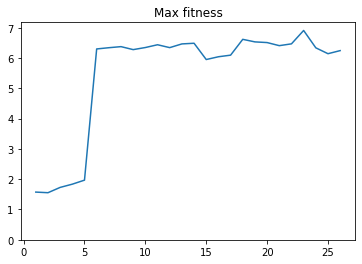

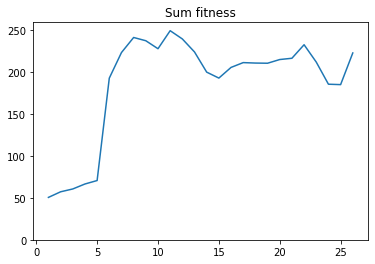

In [29]:
plot_max_fitness(exporter, sm)
plt.show()
plot_sum_fitness(exporter, sm)

In [36]:
last_gen = sm.pick_last(sorted(exporter.list()), slot="generation")
last_gen

'generation_g22'

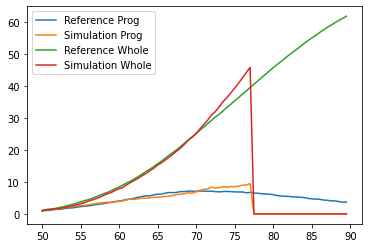

In [37]:
res = exporter.load(last_gen)
sol = pick_best(res)
show_curve(sol.stats, REF)

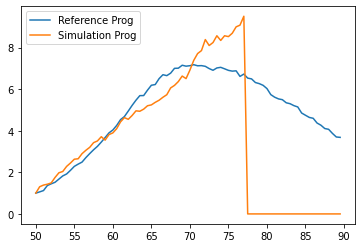

In [38]:
show_curve_progenitor(sol.stats, REF)

fit is  2.1746606933406607


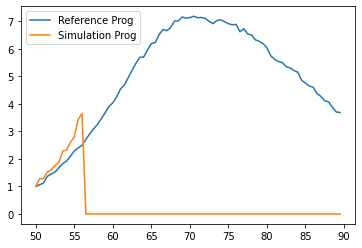

>> G_0: init: 0.06; noise: 3.79; b: 2.86; m: 4.03; expr: 2.54; deg: 4.32; theta: 5.52; tree : 7
>> G_1: init: 2.86; noise: 7.07; b: 2.92; m: 5.74; expr: 2.27; deg: 6.08; theta: 4.74; tree : NOT NOT 0
>> G_2: init: 1.13; noise: 6.18; b: 9.64; m: 5.20; expr: 3.36; deg: 5.47; theta: 6.91; tree : (0 OR 5)
>> G_3: init: 0.48; noise: 3.01; b: 2.34; m: 4.10; expr: 8.11; deg: 2.51; theta: 1.83; tree : 8
>> G_4: init: 1.51; noise: 1.04; b: 9.51; m: 3.22; expr: 5.22; deg: 6.85; theta: 7.17; tree : NOT (((((2 OR 10) AND 8) OR NOT 7) AND 1) OR 5)
>> G_5: init: 2.39; noise: 5.04; b: 9.15; m: 7.59; expr: 3.52; deg: 3.62; theta: 5.87; tree : NOT 0
>> G_6: init: 1.51; noise: 3.09; b: 9.33; m: 6.17; expr: 0.94; deg: 2.34; theta: 0.38; tree : (NOT (5 AND 0) OR 10)
>> G_7: init: 0.76; noise: 7.25; b: 5.20; m: 5.94; expr: 4.05; deg: 6.64; theta: 4.89; tree : NOT (NOT 8 OR (9 AND 7))
>> G_8: init: 1.10; noise: 3.60; b: 4.94; m: 8.33; expr: 2.74; deg: 2.73; theta: 3.00; tree : (3 AND (0 AND 6))
>> G_9: init

In [57]:
res = exporter.load(last_gen)
sol, stats = pick_best_sol_stats(res)
show_curve_progenitor(stats, REF)
sol.grn

G_1: init: 2.89; noise: 5.98; b: 5.55; m: 5.53; expr: 7.05; deg: 0.04; thr: 5.68; theta: 3.47; tree : ((NOT (NOT NOT 4 AND 5) AND 6) OR 1)
G_1: init: 2.89; noise: 5.98; b: 5.55; m: 5.53; expr: 7.05; deg: 0.04; thr: 5.68; theta: 3.47; tree : ((NOT (NOT NOT 4 AND 3) AND 6) OR 1)
G_1: init: 2.89; noise: 5.98; b: 5.55; m: 5.53; expr: 7.05; deg: 0.04; thr: 5.68; theta: 3.47; tree : ((NOT (NOT NOT 4 AND 5) AND 6) OR 1)
G_1: init: 2.89; noise: 5.98; b: 5.55; m: 5.53; expr: 7.05; deg: 0.04; thr: 5.68; theta: 7.90; tree : ((NOT (NOT NOT 4 AND 5) AND 6) OR 1)

G_1: init: 2.89; noise: 5.98; b: 5.55; m: 5.87; expr: 7.05; deg: 0.04; thr: 5.68; theta: 3.47; tree : (NOT (NOT NOT 4 AND 5) OR 1)